<a href="https://colab.research.google.com/github/mapmatters/coursera-nlp/blob/main/nlp_class_1_Week1_nb03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')
import os
os.chdir('/content/drive/MyDrive/coursera/nlp')
!ls

Mounted at /content/drive
'nlp class 1 - Week1 - nb01'  'nlp class 1 - Week1 - nb02 (1)'	 __pycache__
'nlp class 1 - Week1 - nb02'   py


In [2]:
import nltk                         # NLP toolbox
from os import getcwd
import pandas as pd                 # Library for Dataframes 
from nltk.corpus import twitter_samples 
import matplotlib.pyplot as plt     # Library for visualization
import numpy as np                  # Library for math functions

In [3]:
# import my functions
import sys
sys.path.append('py')
import my_utils as my

In [4]:
nltk.download('stopwords')
nltk.download('twitter_samples')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package twitter_samples to /root/nltk_data...
[nltk_data]   Unzipping corpora/twitter_samples.zip.


True

In [5]:
# Load the NLTK sample dataset
# select the set of positive and negative tweets
all_positive_tweets = twitter_samples.strings('positive_tweets.json')
all_negative_tweets = twitter_samples.strings('negative_tweets.json')

tweets = all_positive_tweets + all_negative_tweets ## Concatenate the lists. 
labels = np.append(np.ones((len(all_positive_tweets),1)), np.zeros((len(all_negative_tweets),1)), axis = 0)

# split the data into two pieces, one for training and one for testing (validation set) 
train_pos  = all_positive_tweets[:4000]
train_neg  = all_negative_tweets[:4000]

train_x = train_pos + train_neg 

print("Number of tweets: ", len(train_x))

Number of tweets:  8000


### Load the extracted features

In [6]:
m = len(labels)
aX = np.zeros((m,4))
freqs = my.build_freqs(tweets, labels)

In [8]:
for i in range(m):
  p_tweet = my.process_tweet(tweets[i])
  a = list(my.extract_features(p_tweet, freqs))
  b = labels[i]
  # X[i,:] = np.append(np.ones((len(all_positive_tweets),1)), np.zeros((len(all_negative_tweets),1)), axis = 0)
  aX[i,:] = np.append(a, b, axis=0)
aX

array([[1.000e+00, 3.764e+03, 7.200e+01, 1.000e+00],
       [1.000e+00, 4.464e+03, 5.170e+02, 1.000e+00],
       [1.000e+00, 3.759e+03, 1.600e+02, 1.000e+00],
       ...,
       [1.000e+00, 3.400e+01, 4.640e+03, 0.000e+00],
       [1.000e+00, 1.000e+01, 4.585e+03, 0.000e+00],
       [1.000e+00, 1.160e+02, 5.820e+02, 0.000e+00]])

In [9]:
nam = ['bias', 'positive', 'negative', 'sentiment']
data_all = pd.DataFrame(aX, columns=nam)
data_all

,bias,positive,negative,sentiment
0,1.0,3764.0,72.0,1.0
1,1.0,4464.0,517.0,1.0
2,1.0,3759.0,160.0,1.0
3,1.0,3589.0,4.0,1.0
4,1.0,3915.0,280.0,1.0
...,...,...,...,...
9995,1.0,56.0,4698.0,0.0
9996,1.0,3.0,4588.0,0.0
9997,1.0,34.0,4640.0,0.0
9998,1.0,10.0,4585.0,0.0


In [10]:
labels_train = np.append(np.ones((len(train_pos),1)), np.zeros((len(train_neg),1)), axis = 0)
l = len(labels_train)
tX = np.zeros((l,4))
freqs_train = my.build_freqs(train_x, labels_train)
for i in range(l):
  p_tweet = my.process_tweet(train_x[i])
  a = list(my.extract_features(p_tweet, freqs_train))
  b = labels_train[i]
  # X[i,:] = np.append(np.ones((len(all_positive_tweets),1)), np.zeros((len(all_negative_tweets),1)), axis = 0)
  tX[i,:] = np.append(a, b, axis=0)

data = pd.DataFrame(tX, columns=nam)
data

,bias,positive,negative,sentiment
0,1.0,3020.0,61.0,1.0
1,1.0,3573.0,444.0,1.0
2,1.0,3005.0,115.0,1.0
3,1.0,2862.0,4.0,1.0
4,1.0,3119.0,225.0,1.0
...,...,...,...,...
7995,1.0,29.0,3706.0,0.0
7996,1.0,62.0,323.0,0.0
7997,1.0,144.0,783.0,0.0
7998,1.0,205.0,3890.0,0.0


In [11]:
data.shape

(8000, 4)

In [12]:
X = data[['bias','positive','negative']].values
Y = data['sentiment'].values

print(X.shape)
print(X)

(8000, 3)
[[1.000e+00 3.020e+03 6.100e+01]
 [1.000e+00 3.573e+03 4.440e+02]
 [1.000e+00 3.005e+03 1.150e+02]
 ...
 [1.000e+00 1.440e+02 7.830e+02]
 [1.000e+00 2.050e+02 3.890e+03]
 [1.000e+00 1.890e+02 3.974e+03]]


### Load pretrained logistic regression model

In [13]:
theta = [7e-08, 0.0005239, -0.00055517]

### Plot the samples in a scatter plot

Text(0, 0.5, 'Negative')

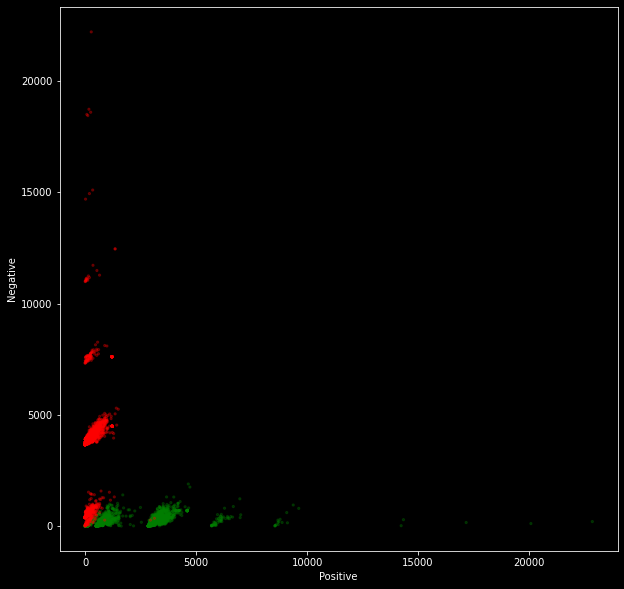

In [14]:
plt.style.use('dark_background')
fig, ax = plt.subplots(figsize = (10,10))
colors = ['red','green']

ax.scatter(X[:,1], X[:,2], c=[colors[int(k)] for k in Y], s=5, alpha=0.3)
plt.xlabel("Positive")
plt.ylabel("Negative")

In [16]:
# equation for the sepraration plane
# f(pos, neg, W) = w0 + w1*pos + w2*neg = 0
# s(pos, W) = (w0 - w1*pos) / w2
def neg(theta, pos):
  return (-theta[0] - pos*theta[1])/theta[2]

# direction of the sentiminets change
# perpendicular to the separation plane
def direction(theta, pos):
  return pos * theta[2]/theta[1]

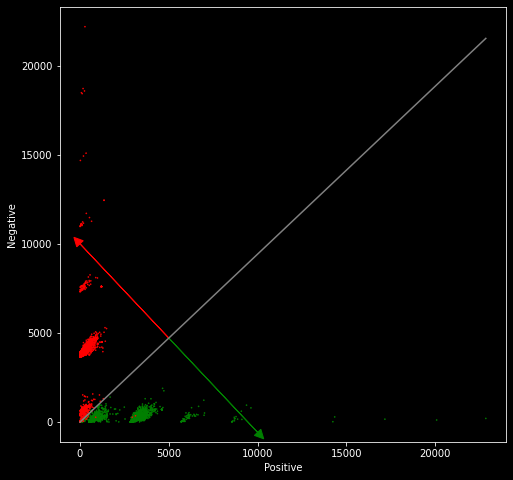

In [17]:
fig, ax = plt.subplots(figsize =(8,8))

color = ['red', 'green']

ax.scatter(X[:,1], X[:,2], c=[colors[int(k)] for k in Y], s = 0.4)
plt.xlabel("Positive")
plt.ylabel("Negative")

# represent the logistic regression model
maxpos = np.max(X[:,1])
offset = 5000 # the pos value for the direction vectors origin

# plot a gray line that divides the 2 areas
ax.plot([0, maxpos], [neg(theta,0), neg(theta, maxpos)], color = 'gray')

ax.arrow(offset, neg(theta, offset), offset, direction(theta, offset), head_width=500, head_length=500, fc='g', ec='g')
ax.arrow(offset, neg(theta, offset), -offset, -direction(theta, offset), head_width=500, head_length=500, fc='r', ec='r')

plt.show()